In [1]:
import pandas as pd
import os
import numpy as np
#import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing #scaling
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
#Reading file
cwd=os.getcwd()
filename=cwd+ '/default of credit card clients.xls'
df = pd.read_excel(filename, header=1, skiprows=0, index_col=0)
df.rename(index=str, columns={"default payment next month": "defPayNextMonth","PAY_0":"PAY_1"}, inplace=True)
print(df.keys())
sex = [1,2]
education = [1,2,3,4]
marriage = [1,2,3]
df = df[df["SEX"].isin(sex)]
df = df[df['EDUCATION'].isin(education)]
df = df[df['MARRIAGE'].isin(marriage)]
#We observe undocumented values for repayment status variables: -2 and 0.
#PAY-->4030 remaining observations-->too many 0 and -2
len(df) #29601 remaining observation
# when pay=-2-->0
def adjust_pay(pay_vars):
    for i in pay_vars:
        fil = (df[i] == -2) | (df[i] == 0)
        df.loc[fil,i] = 0
        print("These are the new observed values for " + str(i) + ":")
        print(df[i].value_counts())
pay_variables= df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
new_pay_variables=adjust_pay(pay_variables)
#EDA
data=df.loc[:, df.columns != 'defPayNextMonth'].values
target=df.loc[:, df.columns == 'defPayNextMonth'].values

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'defPayNextMonth'],
      dtype='object')
These are the new observed values for PAY_1:
 0    17207
-1     5633
 1     3662
 2     2640
 3      320
 4       76
 5       24
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64
These are the new observed values for PAY_2:
 0    19198
-1     5990
 2     3904
 3      326
 4       97
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
These are the new observed values for PAY_3:
 0    19545
-1     5863
 2     3802
 3      237
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
These are the new observed values for PAY_4:
 0    20491
-1     5617
 2     3142
 3      180
 

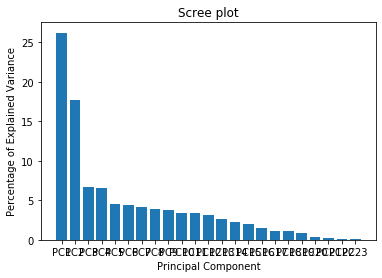

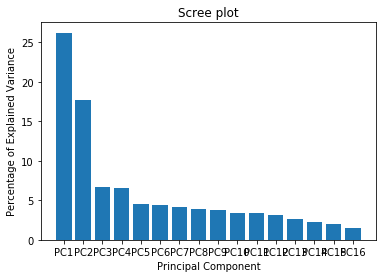

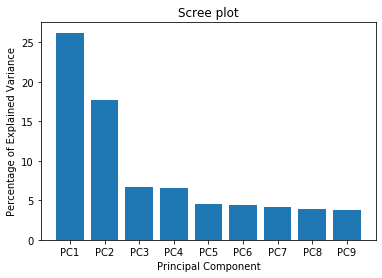

loading scores for the top 10 of PC1
14    0.386815
15    0.384591
13    0.382889
12    0.378040
16    0.377150
11    0.366780
0     0.132415
17    0.119418
19    0.111756
18    0.102361
dtype: float64
loading scores for the top 10 of PC2
8    -0.394638
7    -0.385622
9    -0.384195
6    -0.373565
10   -0.356937
5    -0.342493
0     0.237555
19    0.128698
17    0.125000
20    0.119190
dtype: float64


In [4]:
scaled_data=pd.DataFrame(StandardScaler().fit_transform(data))
pca=PCA()
pca1=PCA(0.95)
pca2=PCA((0.99)**(25)) #Percentage of Cumulative Variance(with "Zani" consideration)-->threshold**p(n. of variables)
pcas=[pca,pca1,pca2]
for i in pcas:
    i.fit(scaled_data)
    i_data=i.transform(scaled_data)
    per_var=np.round(i.explained_variance_ratio_*100, decimals=1)
    labels=["PC"+str(x) for x in range (1,len(per_var)+1)]

    plt.bar(x=range(1,len(per_var)+1),height=per_var, tick_label=labels)
    plt.ylabel("Percentage of Explained Variance")
    plt.xlabel("Principal Component")
    plt.title("Scree plot")
    plt.show()
loading_scores_1=pd.Series(pca.components_[0])
sorted_loading_scores_1=loading_scores_1.abs().sort_values(ascending=False)
top_10_var_PC1=sorted_loading_scores_1[0:10].index.values
print("loading scores for the top 10 of PC1")
print(loading_scores_1[top_10_var_PC1])
loading_scores_2=pd.Series(pca.components_[1])
sorted_loading_scores_2=loading_scores_2.abs().sort_values(ascending=False)
top_10_var_PC2=sorted_loading_scores_2[0:10].index.values
print("loading scores for the top 10 of PC2")
print(loading_scores_2[top_10_var_PC2])